In [24]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from pathlib import Path
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, classification_report

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
df_red = pd.read_csv("wine_quality.csv")
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df_white = pd.read_csv("winequality-white.csv")
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [27]:
df_white = pd.read_csv("winequality-white.csv",sep=";",header=0)
df_white.columns=[x.replace(" ","_") for x in df_white.columns]
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
df_red["wine_type"]="red"
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
df_white["wine_type"]="white"
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [34]:
#Keep quality and wine_type as independent targets
#3 buckets use oversampling
#2 bucket quality
pd.concat([df_red, df_white], ignore_index=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
#Do we need to scale based on the range?
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#Creating a copy of data for processing
df2 = df.copy()
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#How many wines fall in each quality category
#Looks like a majority fall between 5 & 6 
#(681+638)/1599; 82.5% of data points fall between these two quality ratings
df2.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
#We can split the quality into the below categories:
#3 & 4 as low
#5 as medium
#6 as good
#7 & 8 as excelent

In [8]:
df2.fixed_acidity.value_counts()

fixed_acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64

In [9]:
df2.alcohol.value_counts()

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

In [10]:
df2.sulphates.value_counts()

sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: count, Length: 96, dtype: int64

In [11]:
df2.residual_sugar.value_counts()

residual_sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64

In [12]:
#What are the stats on fixed_acidity values and the quality category they fall under
#Quality falls between 5 & 6 when the fixed_acidity ranges between 4.7 and 15.9
#Lower quality wines seem to have fixed_acidity between 4.6 and 12.5
#Higher qulity wines seem to have fixed_acidity between 5 and 12.6
df.groupby("quality").fixed_acidity.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,8.360000,1.770875,6.7,7.15,7.50,9.875,11.6
4,53.0,7.779245,1.626624,4.6,6.80,7.50,8.400,12.5
5,681.0,8.167254,1.563988,5.0,7.10,7.80,8.900,15.9
6,638.0,8.347179,1.797849,4.7,7.00,7.90,9.400,14.3
7,199.0,8.872362,1.992483,4.9,7.40,8.80,10.100,15.6
8,18.0,8.566667,2.119656,5.0,7.25,8.25,10.225,12.6


In [13]:
#Looks like high quality wine (8) has sulphate value between 0.63 and 1.10
df.groupby("quality").sulphates.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [14]:
#This kind of looks like the higher the alcohol rating, the higher the quality score
df.groupby("quality").alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [15]:
df.groupby("quality").residual_sugar.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,2.635000,1.401596,1.2,1.875,2.1,3.10,5.7
4,53.0,2.694340,1.789436,1.3,1.900,2.1,2.80,12.9
5,681.0,2.528855,1.359753,1.2,1.900,2.2,2.60,15.5
6,638.0,2.477194,1.441576,0.9,1.900,2.2,2.50,15.4
7,199.0,2.720603,1.371509,1.2,2.000,2.3,2.75,8.9
8,18.0,2.577778,1.295038,1.4,1.800,2.1,2.60,6.4


In [16]:
#What is the correlation between the features
#Degree of correlation:
#Perfect: If the value is near ± 1
#High degree: If the coefficient value lies between ± 0.50 and ± 1
#Moderate degree: If the value lies between ± 0.30 and ± 0.49
#Low degree: When the value lies below + .29
#No correlation: When the value is zero

#quality has correlations with sulphates and alcohol
corrs = df2.corr(method='pearson')
corrs

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


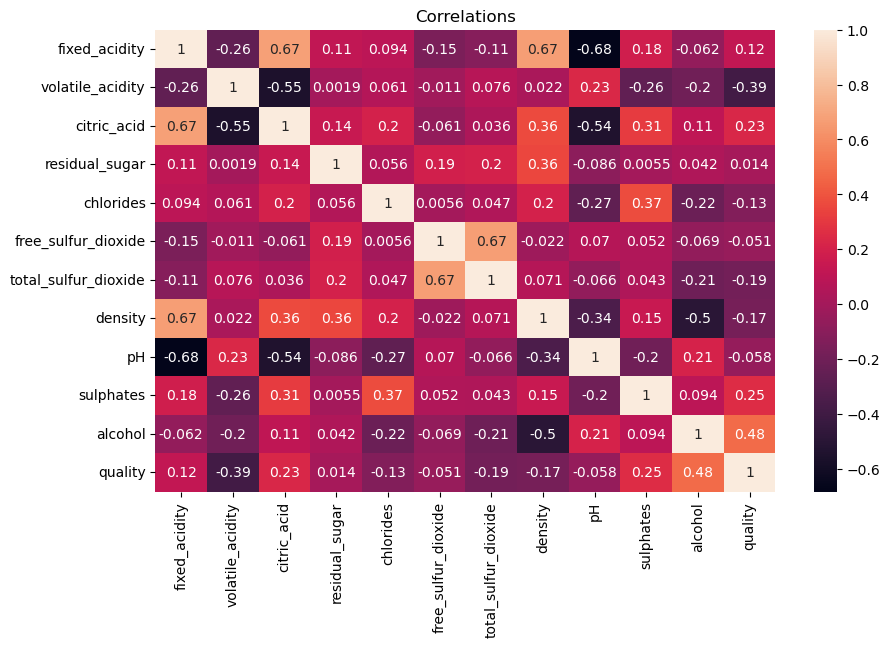

In [17]:
#Target (qaulity) has 
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.title("Correlations")
plt.show()

In [18]:
abs(corrs["quality"]).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
pH                      0.057731
free_sulfur_dioxide     0.050656
residual_sugar          0.013732
Name: quality, dtype: float64

In [19]:
# Define the features and the target
target = "quality"
features = ["alcohol", "volatile_acidity", "sulphates", "citric_acid", "total_sulfur_dioxide", 
            "density", "chlorides", "fixed_acidity", "pH", "free_sulfur_dioxide", "residual_sugar"]

X = df.loc[:, features]
y = df[target]

X.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,chlorides,fixed_acidity,pH,free_sulfur_dioxide,residual_sugar
0,9.4,0.70,0.56,0.00,34.0,0.9978,0.076,7.4,3.51,11.0,1.9
1,9.8,0.88,0.68,0.00,67.0,0.9968,0.098,7.8,3.20,25.0,2.6
2,9.8,0.76,0.65,0.04,54.0,0.9970,0.092,7.8,3.26,15.0,2.3
3,9.8,0.28,0.58,0.56,60.0,0.9980,0.075,11.2,3.16,17.0,1.9
4,9.4,0.70,0.56,0.00,34.0,0.9978,0.076,7.4,3.51,11.0,1.9


In [20]:
# Initialize the model
lm = LinearRegression()

# Fit the Model
lm.fit(X, y)

# Predict the Model
preds = lm.predict(X)

# Evaluate the Model
mse = mean_squared_error(y, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)

report = f"""
R2: {r2}
MSE: {mse}
RMSE: {rmse}
MAE: {mae}
"""
print(report)

print(lm.coef_, lm.intercept_)

#R2 value is low (below 0.4) meaning there is a low correlation
#MSE value is slightly higher than we would like. The closer to 0, the better the model
#RMSE is kind of high, the model is better the lower it is
#MAE value should be lower for a better fit model but ours is kind of high


R2: 0.36055170303770123
MSE: 0.41676716722205126
RMSE: 0.6455750670697028
MAE: 0.5004899635657735

[ 2.76197699e-01 -1.08359026e+00  9.16334413e-01 -1.82563948e-01
 -3.26457970e-03 -1.78811638e+01 -1.87422516e+00  2.49905527e-02
 -4.13653144e-01  4.36133331e-03  1.63312698e-02] 21.965208454305532


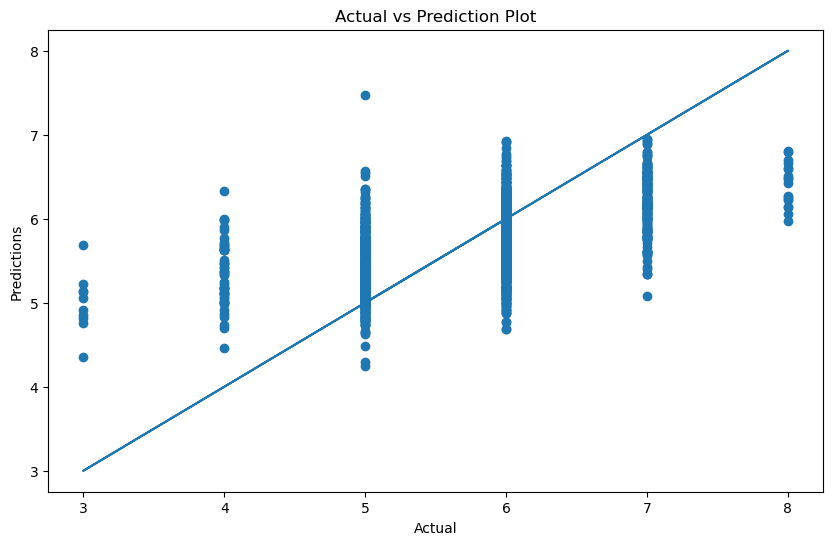

In [21]:
# Predicted vs Actual Plot
plt.figure(figsize=(10,6))
plt.scatter(y, preds)
plt.plot(y, y)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Prediction Plot")

plt.show()

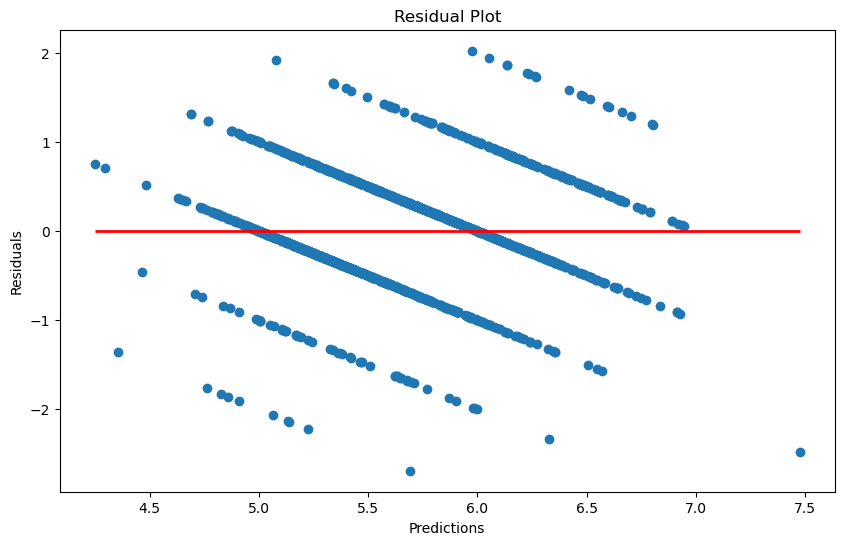

In [22]:
# Residual Plot
resids = y - preds

# Make the plot
plt.figure(figsize=(10,6))
plt.scatter(preds, resids)
plt.hlines(y=0, xmin=min(preds), xmax=max(preds), linewidth=2, color='r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

In [23]:
#I don't think PCA will help much since a lot of the features did not have a strong correlation to our target

In [24]:
#RANDOM FOREST (unsupervised)
# Definethe features and the Target
#target = "quality"
#features = ["alcohol", "volatile_acidity", "sulphates", "citric_acid", "total_sulfur_dioxide", 
#            "density", "chlorides", "fixed_acidity", "pH", "free_sulfur_dioxide", "residual_sugar" ]

#X = df.loc[:, features]
#y = df[target]

# Initialize the model
#rf = RandomForestClassifier()

# Fit the Model
#rf.fit(X, y)

# Predict the Model
#preds = rf.predict(X)

# Evaluate the Model
#mse = mean_squared_error(y, preds)
#rmse = np.sqrt(mse)
#mae = mean_absolute_error(y, preds)
#r2 = r2_score(y, preds)

#report = f"""
#R2: {r2}
#MSE: {mse}
#RMSE: {rmse}
#MAE: {mae}
#"""
#print(report)

In [25]:
# RANDOM FOREST (supervised)
# Define features set
X = df2.copy()
X.drop("quality", axis=1, inplace=True)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
# Define target vector
y = df2["quality"].ravel()
y[:5]

array([5, 5, 5, 6, 5])

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [29]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [34]:
# Model evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"], 
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 0,0,1,2,1,0,0
Actual 1,0,0,7,3,0,0
Actual 2,0,0,154,31,0,0
Actual 3,0,1,34,101,3,0
Actual 4,0,0,1,27,26,1
Actual 5,0,0,0,3,3,1


Accuracy Score : 0.705
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.78      0.83      0.80       185
           6       0.61      0.73      0.66       139
           7       0.81      0.47      0.60        55
           8       0.50      0.14      0.22         7

    accuracy                           0.70       400
   macro avg       0.45      0.36      0.38       400
weighted avg       0.69      0.70      0.69       400



In [36]:
# Feature Importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14178969819678358, 'alcohol'),
 (0.10929154477564505, 'sulphates'),
 (0.10747138600838237, 'volatile_acidity'),
 (0.10146829611350117, 'total_sulfur_dioxide'),
 (0.09131815573129633, 'density'),
 (0.08224322294841939, 'chlorides'),
 (0.07987966254142118, 'pH'),
 (0.07487397371929642, 'citric_acid'),
 (0.07430271903230956, 'fixed_acidity'),
 (0.07149010086918599, 'residual_sugar'),
 (0.06587124006375904, 'free_sulfur_dioxide')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

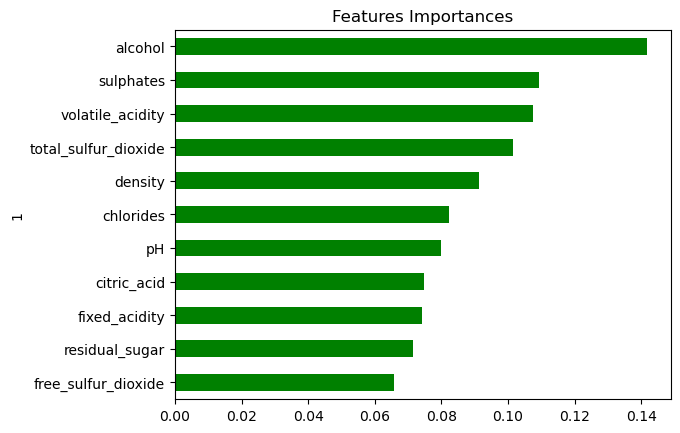

In [37]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)

In [38]:
#KNN Analysis

# Split target column from dataset
y = df2['quality']
X = df2.drop(columns='quality')

In [39]:
# Preview the data
X[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
# Print first five entries for target
y[:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [41]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [42]:
# Preview the data
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [43]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
X_train.shape

(1199, 11)

In [45]:
X_test.shape

(400, 11)

In [46]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [48]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([5, 5, 7, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 7, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6,
       7, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 4, 7, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 7, 3, 5, 6, 6, 5, 7, 6, 6, 5,
       7, 5, 6, 6, 4, 7, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 5, 5, 4, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 5, 7, 5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 6, 5, 5, 5, 5, 4, 5, 6, 6,
       5, 6, 5, 7, 6, 5, 4, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 5, 4, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 6, 5,

In [50]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[  0,   1,   1,   0,   0,   0],
       [  0,   1,   7,   2,   0,   0],
       [  0,   9, 120,  61,   9,   0],
       [  1,   4,  40,  88,  14,   1],
       [  0,   1,   3,  16,  19,   2],
       [  0,   0,   0,   0,   0,   0]])

In [51]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.10      0.08        10
           5       0.70      0.60      0.65       199
           6       0.53      0.59      0.56       148
           7       0.45      0.46      0.46        41
           8       0.00      0.00      0.00         0

    accuracy                           0.57       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.59      0.57      0.58       400



In [52]:
# Split preprocessed data into features and target arrays
X = df2.drop("quality", axis=1)
y = df2.quality

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(1199, 11)
(400, 11)


In [53]:
len(X.columns)

11

In [54]:
# Created StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
TSNE

sklearn.manifold._t_sne.TSNE

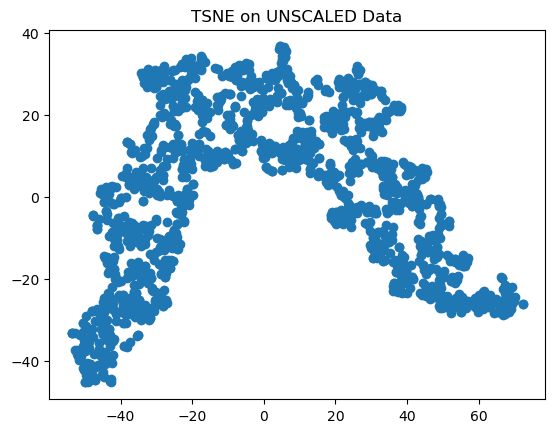

In [56]:
#Cluster data
tsne1 = TSNE()
df_tsne1 = pd.DataFrame(tsne1.fit_transform(df2)) # fit UNSCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on UNSCALED Data")
plt.show()

In [57]:
#Unsupervised Clustering

In [58]:
# Define "X" - features to predict
X = df2 # UNSCALED

In [59]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [60]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,692917.018967,0.602787,2816.875572,NaN
1,3,396316.637351,0.518400,3058.177225,-296600.381616
2,4,284158.421496,0.483759,3051.568398,-112158.215856
3,5,222159.858338,0.444594,3036.789945,-61998.563158
4,6,178317.668241,0.446081,3103.146197,-43842.190097
5,7,150857.016078,0.391735,3103.068346,-27460.652163
6,8,133822.541051,0.396540,3025.378756,-17034.475027
7,9,117617.202374,0.381671,3037.430156,-16205.338676
8,10,102664.355071,0.380312,3116.947743,-14952.847303
9,11,94139.728863,0.379624,3071.731301,-8524.626209


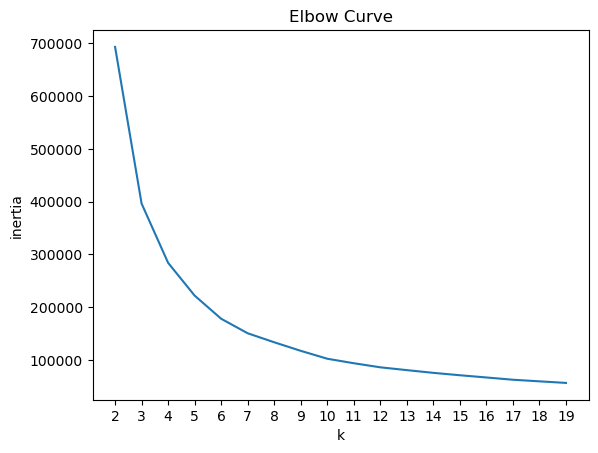

In [61]:
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#Elbow plot not that great...maybe k values between 3-5?

In [62]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# Changes to optimal k values
model = KMeans(n_clusters=5, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df3 = df2.copy()
df3['clusters'] = preds

df3.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3


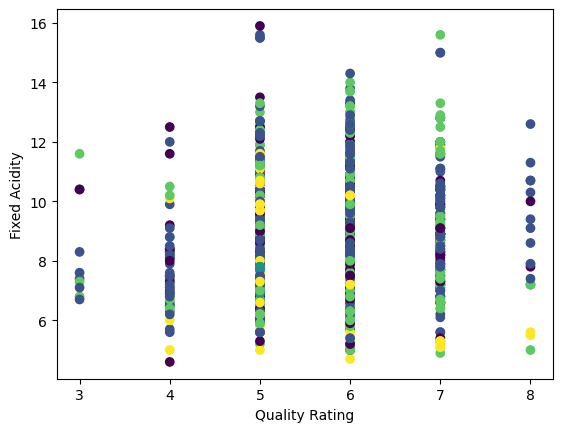

In [63]:
# Plot the clusters
plt.scatter(df2.quality, df2.fixed_acidity, c=df3.clusters)
plt.ylabel("Fixed Acidity")
plt.xlabel("Quality Rating")
plt.show()

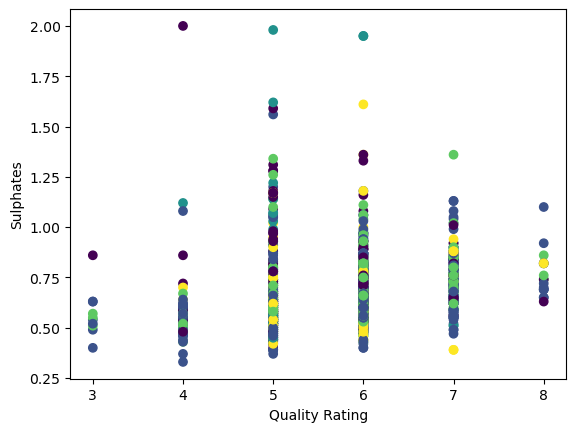

In [64]:
# Plot the clusters
plt.scatter(df2.quality, df2.sulphates, c=df3.clusters)
plt.xlabel("Quality Rating")
plt.ylabel("Sulphates")
plt.show()

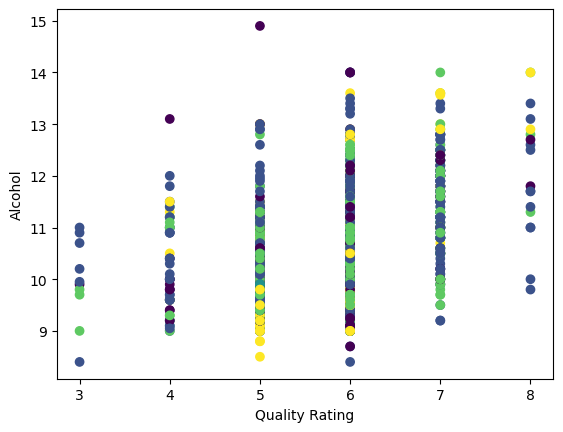

In [65]:
# Plot the clusters
plt.scatter(df2.quality, df2.alcohol, c=df3.clusters)
plt.xlabel("Quality Rating")
plt.ylabel("Alcohol")
plt.show()

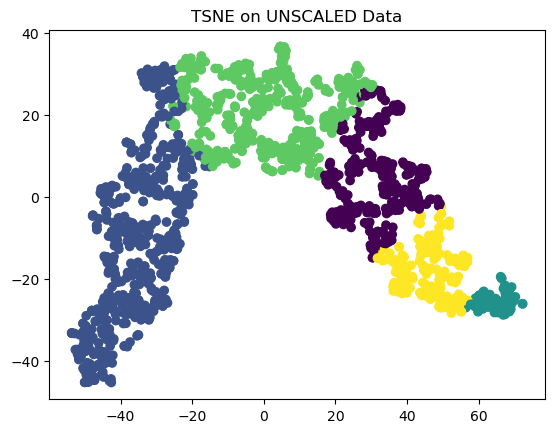

In [66]:
# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1], c=df3.clusters)
plt.title("TSNE on UNSCALED Data")
plt.show()

In [67]:
#Birch

In [68]:
# Define your "X" - features to predict
X = df2

In [69]:
# Create a a list to store inertia values
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    birch_model = Birch(n_clusters=i)
    
    # fit the model
    birch_model.fit(X)
    
    # predict the model
    preds = birch_model.predict(X)
    
    # evaluate the model (generate the metics)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [70]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(20)

,k,silhouette_score,cha_score
0,2,0.614761,2428.036440
1,3,0.503179,2891.028423
2,4,0.500781,2846.155826
3,5,0.385132,2712.325893
4,6,0.385905,2692.489436
5,7,0.364282,2776.396437
6,8,0.349818,2662.480412
7,9,0.355957,2629.995971
8,10,0.357127,2574.824891
9,11,0.287196,2532.175014


In [71]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# Change to optimal k value
model = Birch(n_clusters=5)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df2['clusters2'] = preds

df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,clusters2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


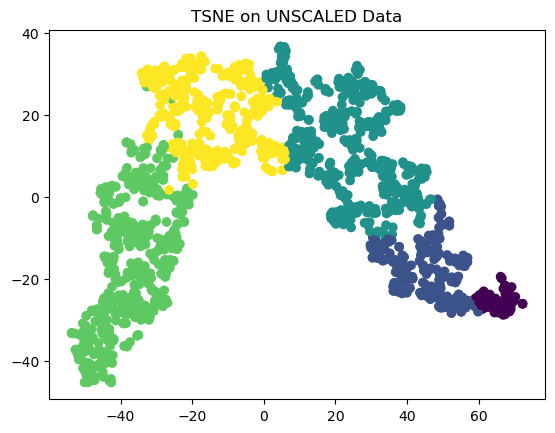

In [72]:
# Plot the clusters
#5 seems to be best?
plt.scatter(df_tsne1[0], df_tsne1[1], c=df2.clusters2)
plt.title("TSNE on UNSCALED Data")
plt.show()